# **Pregunta de negocio**

Dado el contexto de la situación, se desarrolla un análisis exploratorio de datos al dataset Student_performance_data.csv, con la finalidad de determinar si con los datos y las caracteristicas de los mismos, se puede resolver la pregunta clave de negocio, la cual es:

**¿Es posible predecir la deserción estudiantil en las Instuticiones Educativas del Departamento para el próximo periodo, usando datos demográficos y académicos con una efectividad de al menos el 70%?**

A continuación se relacionan los pasos a seguir para dar respuesta a la pregunta clave.

1. *Cargue del dataset tomado de: https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset
2. Consolidación del diccionario de datos para el entendimiento del caso
3. Instalación y/o cargue de librerias a usar
4. Entendimiento general del dataset - **Selección de columna para solución de problema**
5. Preparación de los datos
    - Ajuste de nombres de columnas y eliminación de columnas que no aportan información
    - Corrección de formato de datos
    - Identificación de outliers usando técnicas visuales y estadísticas
    - Tratamiento de outliers (si aplica)
6. **Análisis Univariado**
    - Análisis estadístico y gráfico

7. **Análisis Bivariado**
    - Análisis estadístico y gráfico
    - Análisis de correlaciones (Pearson, Spearman, Kendall)

8. **Premodelamiento/Preparación de los datos**


**Dataset modificado para desarrollo del ejercicio (modificación var GradeClass a Estado, donde GradeClass=0,1 = Estado=Graduado y GradeClass=2,3,4 = Estado=Abandono)*


# **1. Cargue del dataset**

In [545]:
import pandas as pd
ruta_csv = "C:/Users/cristian/Desktop/Maestria Inteligencia Artificial/Analisis_de_datos_1/Analisis-de-datos1/Student_performance_data.csv"
df = pd.read_csv(ruta_csv)
df.head(5)

StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA    Estado  
0             0  2.929196  Abandono  
1             0  3.042915  Graduado  
2             0  0.112602  Abandono  
3             0  2.054218  Abandono  
4             0  1.288061  Abandono

In [546]:
df.shape

(2392, 15)

### El dataset cuenta con 2392 instancias/estudiantes y 14 columnas/variables

# **2. Consolidación diccionario de datos**

## Dato

- StudentID: Tipo: numérico, Definición: identificador unico asignado a cada individuo en el establecimiento, Unidad de medida: identificador
- Age: Tipo: numérico, Definición: indica la edad de cada individuo, Unidad de medida: Años
- Gender: Tipo: binario, Definición: identifica el género de cada individuo donde 0=masculino y 1=femenino, Unidad de medida: NA
- Ethnicity: Tipo: Categórico ordinal, Definición: identifica el grupo étnico del individuo donde 0=caucásico 1=afroamericano 2=asiático 3=otros, Unidad de medida: NA
- ParentalEducation: Tipo: Categórico ordinal, Definición: identifica el nivel de educación de los padres donde 0=ninguno 1=escuela secundaria 2=un poco de universidad 3=licenciatura 4=superior, Unidad de medida: NA
- StudyTimeWeekly: Tipo: Numérico, Definición: indica las horas de estudio semanal dedicadas por el individuo, Unidad de medida: Horas
- Absences: Tipo: Numérico, Definición: indica el número de ausencias al año, Unidad de medida: Ausencias anuales
- Tutoring: Tipo: binario, Definición: indica si el individuo asiste a tutorias donde 0=no y 1=si, Unidad de medida: NA
- ParentalSupport: Tipo: Categórico ordinal, Definición: identifica el nivel de apoyo que tiene el individuo por parte de sus padres donde 0=ninguno 1=bajo 2=moderado 3=alto 4=muy alto, Unidad de medida: NA
- Extracurricular: Tipo: binario, Definición: indica si el individuo participa en actividades extracurriculares donde 0=no y 1=si, Unidad de medida: NA
- Sports: Tipo: binario, Definición: indica si el individuo participa en actividades deportivas donde 0=no y 1=si, Unidad de medida: NA
- Music: Tipo: binario, Definición: indica si el individuo participa en actividades musicales donde 0=no y 1=si, Unidad de medida: NA
- Volunteering: Tipo: binario, Definición: indica si el individuo participa en actividades de voluntariado donde 0=no y 1=si, Unidad de medida: NA

- GPA: Tipo: Numérico, Definición: indica el promedio de calificaciones obtenidas, Unidad de medida: Puntos

- **Estado: Tipo: binario, Definición: indica si el individuo se graduó o abandonó los estudios donde 0=Graduado y 1=Abandono, Unidad de medida: NA**

# **3. Instalación/cargue de librerias a usar**

## A continuación se importan e indican las funcionalidades de las librerias a usar en este proceso

In [547]:
import numpy as np # Cálculo numérico
import matplotlib.pyplot as plt # Crear gráficas
from matplotlib import rcParams # Personalizar las gráficas
import altair as alt # Crear gráficas interactivas
import plotly.express as px # Crear gráficas interactivas
import pathlib # Manejar rutas de archivo
import seaborn as sns # Crear visualizaciones estadísticas (opcional)
import miceforest as mf # Imputar datos faltantes

# **4. Entendimiento general del dataset**

In [548]:
df.head()

StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA    Estado  
0             0  2.929196  Abandono  
1             0  3.042915  Graduado  
2             0  0.112602  Abandono  
3             0  2.054218  Abandono  
4             0  1.288061  Abandono

## Se ajusta el nombre de las columnas para mejor entendimiento del proceso

In [549]:
df.columns = ["ID_Est","Edad","Genero","Grupo_et","Nivel_edu_padres","Horas_de_est_semanal","Ausencias","Tutoria","Apoyo_padres","Extracurricular","Deporte","Musica","Voluntariado","Prom_notas","Estado_est"]

df.head()

ID_Est  Edad  Genero  Grupo_et  Nivel_edu_padres  Horas_de_est_semanal  \
0    1001    17       1         0                 2             19.833723   
1    1002    18       0         0                 1             15.408756   
2    1003    15       0         2                 3              4.210570   
3    1004    17       1         0                 3             10.028829   
4    1005    17       1         0                 2              4.672495   

   Ausencias  Tutoria  Apoyo_padres  Extracurricular  Deporte  Musica  \
0          7        1             2                0        0       1   
1          0        0             1                0        0       0   
2         26        0             2                0        0       0   
3         14        0             3                1        0       0   
4         17        1             3                0        0       0   

   Voluntariado  Prom_notas Estado_est  
0             0    2.929196   Abandono  
1             0    3.042915   Graduado  
2             0    0.112602   Abandono  
3             0    2.054218   Abandono  
4             0    1.288061   Abandono

## Se transforma la variable Estado_est a las categorías Graduado:0 y Abandono:1, esto con la finalidad de tener la variable dicotómica para su correspondiente tratamiento

In [550]:
df['Estado_est'] = df['Estado_est'].replace({'Graduado': 0, 'Abandono': 1})

C:\Users\cristian\AppData\Local\Temp\ipykernel_34756\2202021212.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [551]:
df.head(10)

ID_Est  Edad  Genero  Grupo_et  Nivel_edu_padres  Horas_de_est_semanal  \
0    1001    17       1         0                 2             19.833723   
1    1002    18       0         0                 1             15.408756   
2    1003    15       0         2                 3              4.210570   
3    1004    17       1         0                 3             10.028829   
4    1005    17       1         0                 2              4.672495   
5    1006    18       0         0                 1              8.191219   
6    1007    15       0         1                 1             15.601680   
7    1008    15       1         1                 4             15.424496   
8    1009    17       0         0                 0              4.562008   
9    1010    16       1         0                 1             18.444466   

   Ausencias  Tutoria  Apoyo_padres  Extracurricular  Deporte  Musica  \
0          7        1             2                0        0       1   
1          0        0             1                0        0       0   
2         26        0             2                0        0       0   
3         14        0             3                1        0       0   
4         17        1             3                0        0       0   
5          0        0             1                1        0       0   
6         10        0             3                0        1       0   
7         22        1             1                1        0       0   
8          1        0             2                0        1       0   
9          0        0             3                1        0       0   

   Voluntariado  Prom_notas  Estado_est  
0             0    2.929196           1  
1             0    3.042915           0  
2             0    0.112602           1  
3             0    2.054218           1  
4             0    1.288061           1  
5             0    3.084184           0  
6             0    2.748237           1  
7             0    1.360143           1  
8             1    2.896819           1  
9             0    3.573474           0

In [552]:
df.tail(10)

ID_Est  Edad  Genero  Grupo_et  Nivel_edu_padres  Horas_de_est_semanal  \
2382    3383    16       0         0                 3             13.941823   
2383    3384    16       1         2                 2             11.736409   
2384    3385    15       1         0                 1             16.655581   
2385    3386    16       1         0                 1              1.445434   
2386    3387    16       0         0                 2             13.814021   
2387    3388    18       1         0                 3             10.680555   
2388    3389    17       0         0                 1              7.583217   
2389    3390    16       1         0                 2              6.805500   
2390    3391    16       1         1                 0             12.416653   
2391    3392    16       1         0                 2             17.819907   

      Ausencias  Tutoria  Apoyo_padres  Extracurricular  Deporte  Musica  \
2382         20        0             2                0        0       0   
2383         18        1             4                0        0       0   
2384         13        1             3                0        1       0   
2385         20        0             3                1        1       0   
2386         14        0             2                0        0       0   
2387          2        0             4                1        0       0   
2388          4        1             4                0        1       0   
2389         20        0             2                0        0       0   
2390         17        0             2                0        1       1   
2391         13        0             2                0        0       0   

      Voluntariado  Prom_notas  Estado_est  
2382             0    1.191929           1  
2383             0    1.810038           1  
2384             0    2.539113           1  
2385             0    1.395631           0  
2386             0    2.000084           1  
2387             0    3.455509           0  
2388             0    3.279150           1  
2389             1    1.142333           1  
2390             0    1.803297           0  
2391             1    2.140014           0

## Se reconoce el tipo de dato inicial del df y se evalua si alguna variable tiene datos nulos

In [553]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Est                2392 non-null   int64  
 1   Edad                  2392 non-null   int64  
 2   Genero                2392 non-null   int64  
 3   Grupo_et              2392 non-null   int64  
 4   Nivel_edu_padres      2392 non-null   int64  
 5   Horas_de_est_semanal  2392 non-null   float64
 6   Ausencias             2392 non-null   int64  
 7   Tutoria               2392 non-null   int64  
 8   Apoyo_padres          2392 non-null   int64  
 9   Extracurricular       2392 non-null   int64  
 10  Deporte               2392 non-null   int64  
 11  Musica                2392 non-null   int64  
 12  Voluntariado          2392 non-null   int64  
 13  Prom_notas            2392 non-null   float64
 14  Estado_est            2392 non-null   int64  
dtypes: float64(2), int64(

In [554]:
df.shape

(2392, 15)

## No se evidencian datos nulos, sin embargo, existen variables que no están en formato correcto de acuerdo a su naturaleza, por lo tanto, se procede a cambiar el tipo de dato

In [555]:
df["Estado_est"] = df["Estado_est"].astype(bool)
df["Genero"] = df["Genero"].astype(bool)
df["Tutoria"] = df["Tutoria"].astype(bool)
df["Extracurricular"] = df["Extracurricular"].astype(bool)
df["Deporte"] = df["Deporte"].astype(bool)
df["Musica"] = df["Musica"].astype(bool)
df["Voluntariado"] = df["Voluntariado"].astype(bool)

## Se verifica que los datos del dataframe queden con los tipos de datos que corresponda

In [556]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Est                2392 non-null   int64  
 1   Edad                  2392 non-null   int64  
 2   Genero                2392 non-null   bool   
 3   Grupo_et              2392 non-null   int64  
 4   Nivel_edu_padres      2392 non-null   int64  
 5   Horas_de_est_semanal  2392 non-null   float64
 6   Ausencias             2392 non-null   int64  
 7   Tutoria               2392 non-null   bool   
 8   Apoyo_padres          2392 non-null   int64  
 9   Extracurricular       2392 non-null   bool   
 10  Deporte               2392 non-null   bool   
 11  Musica                2392 non-null   bool   
 12  Voluntariado          2392 non-null   bool   
 13  Prom_notas            2392 non-null   float64
 14  Estado_est            2392 non-null   bool   
dtypes: bool(7), float64(2

## El df queda estructurado así

- Variables bool: 7
- Variables int: 6
- Variables float: 2

In [557]:
df.describe(include="all")

ID_Est         Edad Genero     Grupo_et  Nivel_edu_padres  \
count   2392.000000  2392.000000   2392  2392.000000       2392.000000   
unique          NaN          NaN      2          NaN               NaN   
top             NaN          NaN   True          NaN               NaN   
freq            NaN          NaN   1222          NaN               NaN   
mean    2196.500000    16.468645    NaN     0.877508          1.746237   
std      690.655244     1.123798    NaN     1.028476          1.000411   
min     1001.000000    15.000000    NaN     0.000000          0.000000   
25%     1598.750000    15.000000    NaN     0.000000          1.000000   
50%     2196.500000    16.000000    NaN     0.000000          2.000000   
75%     2794.250000    17.000000    NaN     2.000000          2.000000   
max     3392.000000    18.000000    NaN     3.000000          4.000000   

        Horas_de_est_semanal    Ausencias Tutoria  Apoyo_padres  \
count            2392.000000  2392.000000    2392   2392.000000   
unique                   NaN          NaN       2           NaN   
top                      NaN          NaN   False           NaN   
freq                     NaN          NaN    1671           NaN   
mean                9.771992    14.541388     NaN      2.122074   
std                 5.652774     8.467417     NaN      1.122813   
min                 0.001057     0.000000     NaN      0.000000   
25%                 5.043079     7.000000     NaN      1.000000   
50%                 9.705363    15.000000     NaN      2.000000   
75%                14.408410    22.000000     NaN      3.000000   
max                19.978094    29.000000     NaN      4.000000   

       Extracurricular Deporte Musica Voluntariado   Prom_notas Estado_est  
count             2392    2392   2392         2392  2392.000000       2392  
unique               2       2      2            2          NaN          2  
top              False   False  False        False          NaN       True  
freq              1475    1666   1921         2016          NaN       2016  
mean               NaN     NaN    NaN          NaN     1.906186        NaN  
std                NaN     NaN    NaN          NaN     0.915156        NaN  
min                NaN     NaN    NaN          NaN     0.000000        NaN  
25%                NaN     NaN    NaN          NaN     1.174803        NaN  
50%                NaN     NaN    NaN          NaN     1.893393        NaN  
75%                NaN     NaN    NaN          NaN     2.622216        NaN  
max                NaN     NaN    NaN          NaN     4.000000        NaN

## De acuerdo a la descripción general de los datos, y la naturaleza de los mismos, se resalta:

- La variable ID_Est no tiene ningun significado desde lo estadístico, mas que corroborar el número de instancias
- La Edad promedio de los estudiantes es de 16.46 años, el menor tiene 15 y el mayor tiene 18 años, y el estudiante que se encuentra en la mitad de los datos tiene 16 años (Q2:50%), dado lo anterior, se puede concluir que las edades de los estudiantes están bastante concentradas alrededor de los 16 años, con una distribución relativamente simétrica y un rango de edades estrecho (15-18 años), no parece haber edades extremas o outliers en los datos.
- Se encuentran 2 tipos de género en el dataset siguiendo lo establecido en el diccionario de datos, donde el género femenino tiene mayor representatividad
- El Grupo_et no tiene valores nulos, y al tener su media de 0.87 se puede intuir en primera instancia que la gran mayoria de los estudiantes pertenecen al grupo étnico causcásico, sin embargo, esto requerirá analisis posteriormente
- El Nivel_edu_padres esta conformado por 5 categrorías, y al tener su media de 1.74 se puede intuir en primera instancia que la gran mayoria de los padres de los estudiantes tienen formación de un poco de universidad y escuela secundaria, sin embargo, esto requerirá analisis posteriormente
- las Horas_de_est_semanal tiene un rango que parte desde 0 a aproximadamente 20 horas, donde la media de estudio semanal es de 9.77 horas con una desviación estandar de 5.04 horas, donde se puede afirmar dada las caracteristicas de la distribución (mediana de 9.70), que alrededor del 68% de los estudiantes dedican entre 4.12 y 15.42 horas de estudio, esto se analizará mas adelante
- Las ausencias tienen un rango entre 0 y 29, siendo el promedio de ausencias de los estudiantes 14.54 con una mediana de 15, y de acuerdo a la desviación estandar de 8.46 se puede concluir que aproximadamente el 95% de los estudiantes registran entre 6 y 23 Ausencias durante el año, esto se analizará detalladamente mas adelante
- Se puede indicar que la mayoría de los estudiantes no asiste a las tutorías
- Respecto al nivel de apoyo por parte de los padres se puede indicar que a la mayoría de los estudiantes sus padres los apoyan de forma moderada, esto se analizará mas adelante
- Frente a la participación en actividades extracurriculares, deportivas, musicales y de voluntariado se puede indicar que la mayoría de los estudiantes no participan en ellas, este análisis será abordado mas adelante
- Respecto al Prom_notas se evidencia que la nota mas baja obtenida fue de 0.0 y la mas alta 4.0, su media fue de 1.90 y con una mediana de 1.89, esto indica que la distribución de las notas es normal, su analisis detallado se hará mas adelante
- Por último, el Estado_est indica si el estudiante se Graduó:0 o Abandonó:1 sus estudios, por lo tanto, se puede indicar que la mayoría de los estudiantes Abandonó sus estudios, **el análisis de esta variable se hará de manera especial ya que esto es lo que se pretende predecir de acuerdo al contexto del problema y a la pregunta SMART**

## Selección y descripción de la columna/variable para el problema de Ciencia de Datos

De acuerdo al planteamiento inicial del problema, donde se indica el grado de deserción estudiantil, y a la estructura de los datos, se identifica que la variable objetivo/target del proceso es **Estado_est**, ya que esta variable indica si el estudiante se Graduó o Abandonó sus estudios, es importante resaltar que esta variable como indicador general compone el indice de deserción. ya que al tener x cantidad de estudiantes que Abandonaron sus estudios el indice se impacta.

Por otro lado, vale la pena mencionar que esta variable afecta directamente el Flujo de Caja de las instituciones, ya que al tener un alto indice de abandono escolar/estudiantil, las Instituciones dejan de percibir ingresos, además de generar alertas respecto a la gestión academico-administrativa de la entidad

Por último, se resalta que el análisis y probable predicción de esta columna objetivo permitirá concluir sobre la pregunta SMART ya que se está preguntando si es posible predecir la deserción estudiandil en las Instituciones Educativas... usando datos demográficos y académicos con una efectividad del 70%

# **5. Preparación de los datos**

## A continuación, se aplican métodos gráficos y estadísticos para identificar valores perdidos y outliers para cada variable del dataset y luego abordar el análisis Univariado de la variable objetivo de estudio **Estado_est**

### Antes de continuar, se procede a eliminar del dataset la columna ID_Est que no aportará nada al análisis

In [558]:
df.drop("ID_Est", axis = 1, inplace=True)
df.head()

Edad  Genero  Grupo_et  Nivel_edu_padres  Horas_de_est_semanal  Ausencias  \
0    17    True         0                 2             19.833723          7   
1    18   False         0                 1             15.408756          0   
2    15   False         2                 3              4.210570         26   
3    17    True         0                 3             10.028829         14   
4    17    True         0                 2              4.672495         17   

   Tutoria  Apoyo_padres  Extracurricular  Deporte  Musica  Voluntariado  \
0     True             2            False    False    True         False   
1    False             1            False    False   False         False   
2    False             2            False    False   False         False   
3    False             3             True    False   False         False   
4     True             3            False    False   False         False   

   Prom_notas  Estado_est  
0    2.929196        True  
1    3.042915       False  
2    0.112602        True  
3    2.054218        True  
4    1.288061        True

### Identificación de outliers para cada variable numérica

#### Método visual Boxplot

In [559]:
fig = px.box(df, y=['Edad', 'Horas_de_est_semanal', 'Ausencias', 'Prom_notas'])
fig.show()

##### No hay evidencia visual de outliers en el dataset para las variables numéricas

#### Método visual Histogramas

In [560]:
variables = ['Edad', 'Horas_de_est_semanal', 'Ausencias', 'Prom_notas']

for var in variables:
    fig = px.histogram(df, x=var, title=f'Histograma de {var}')
    fig.show()

##### No hay evidencia visual de outliers en el dataset para las variables numéricas

#### Método Estadístico para identificar outliers con IQR

In [561]:
# Se define una funcion para identificar los outliers fuera del IQR
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[ ((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR))) ]
   return outliers

In [562]:
# Identificar outliers para la Edad
outliers = find_outliers_IQR(df['Edad'])

print('número de outliers en Edad: '+ str(len(outliers)))
print('max valor outlier: ' + str(outliers.max()))
print('min valor outlier: ' + str(outliers.min()))

print(outliers)

número de outliers en Edad: 0
max valor outlier: nan
min valor outlier: nan
Series([], Name: Edad, dtype: int64)


In [563]:
# Identificar outliers para la Horas_de_est_semanal
outliers = find_outliers_IQR(df['Horas_de_est_semanal'])

print('número de outliers en Horas_de_est_semanal: '+ str(len(outliers)))
print('max valor outlier: ' + str(outliers.max()))
print('min valor outlier: ' + str(outliers.min()))

print(outliers)

número de outliers en Horas_de_est_semanal: 0
max valor outlier: nan
min valor outlier: nan
Series([], Name: Horas_de_est_semanal, dtype: float64)


In [564]:
# Identificar outliers para la Ausencias
outliers = find_outliers_IQR(df['Ausencias'])

print('número de outliers en Ausencias: '+ str(len(outliers)))
print('max valor outlier: ' + str(outliers.max()))
print('min valor outlier: ' + str(outliers.min()))

print(outliers)

número de outliers en Ausencias: 0
max valor outlier: nan
min valor outlier: nan
Series([], Name: Ausencias, dtype: int64)


In [565]:
# Identificar outliers para la Prom_notas
outliers = find_outliers_IQR(df['Prom_notas'])

print('número de outliers en Prom_notas: '+ str(len(outliers)))
print('max valor outlier: ' + str(outliers.max()))
print('min valor outlier: ' + str(outliers.min()))

print(outliers)

número de outliers en Prom_notas: 0
max valor outlier: nan
min valor outlier: nan
Series([], Name: Prom_notas, dtype: float64)


##### No hay evidencia estadística de outliers en el dataset para las variables numéricas, por lo tanto, no se aplican tecnicas para su tratamiento

# **6. Análisis univariado de variable objetivo Estado_est**

## De acuerdo al planteamiento inicial del problema, donde se indica el grado de deserción estudiantil, y a la estructura de los datos, se identifica que la variable objetivo/target del proceso es **Estado_est**, por lo cual se procede a hacer el análisis univariado

### Se evidencia que la variable objetivo es de tipo bool y no tiene datos nullos

In [566]:
print("El tipo de dato de la variable Estado_est es: ",df["Estado_est"].dtype)
print("-----------------------------------------------------------")
print("La cantidad de valores nulos de la columna Estado_est es: ", df['Estado_est'].isnull().sum())

El tipo de dato de la variable Estado_est es:  bool
-----------------------------------------------------------
La cantidad de valores nulos de la columna Estado_est es:  0


In [567]:
# Resumen estadístico de la variable 'Estado_est'
estado_est_counts = df['Estado_est'].value_counts()
print("La cantidad de valores que tiene la variable Estado_est es: ",estado_est_counts)
print("-----------------------------------------------------------")
# Porcentajes
estado_est_percent = df['Estado_est'].value_counts(normalize=True) * 100
print("La distribución de los estados en la variable es :",estado_est_percent)


La cantidad de valores que tiene la variable Estado_est es:  Estado_est
True     2016
False     376
Name: count, dtype: int64
-----------------------------------------------------------
La distribución de los estados en la variable es : Estado_est
True     84.280936
False    15.719064
Name: proportion, dtype: float64


In [568]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Edad                  2392 non-null   int64  
 1   Genero                2392 non-null   bool   
 2   Grupo_et              2392 non-null   int64  
 3   Nivel_edu_padres      2392 non-null   int64  
 4   Horas_de_est_semanal  2392 non-null   float64
 5   Ausencias             2392 non-null   int64  
 6   Tutoria               2392 non-null   bool   
 7   Apoyo_padres          2392 non-null   int64  
 8   Extracurricular       2392 non-null   bool   
 9   Deporte               2392 non-null   bool   
 10  Musica                2392 non-null   bool   
 11  Voluntariado          2392 non-null   bool   
 12  Prom_notas            2392 non-null   float64
 13  Estado_est            2392 non-null   bool   
dtypes: bool(7), float64(2), int64(5)
memory usage: 147.3 KB


### A continuación, se despliegan las visuales univariadas

In [569]:
# Graficamos
# Convertir la variable booleana en etiquetas para mejor entendimiento
df["Estado_est"] = df["Estado_est"].replace({False: "Graduado", True: "Abandono"})
# Graficar el histograma con las etiquetas asignadas
fig = px.histogram(df, width=700, height=500, x='Estado_est', labels={'Estado_est': 'Estado Estudiantil'})
fig.show()

In [570]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Edad                  2392 non-null   int64  
 1   Genero                2392 non-null   bool   
 2   Grupo_et              2392 non-null   int64  
 3   Nivel_edu_padres      2392 non-null   int64  
 4   Horas_de_est_semanal  2392 non-null   float64
 5   Ausencias             2392 non-null   int64  
 6   Tutoria               2392 non-null   bool   
 7   Apoyo_padres          2392 non-null   int64  
 8   Extracurricular       2392 non-null   bool   
 9   Deporte               2392 non-null   bool   
 10  Musica                2392 non-null   bool   
 11  Voluntariado          2392 non-null   bool   
 12  Prom_notas            2392 non-null   float64
 13  Estado_est            2392 non-null   object 
dtypes: bool(6), float64(2), int64(5), object(1)
memory usage: 163.6+ KB


In [571]:
fig = px.pie(df, names='Estado_est', width=700, height=500, title='Distribución de Estado Estudiantil')
# Mostrar el gráfico
fig.show()

In [572]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Edad                  2392 non-null   int64  
 1   Genero                2392 non-null   bool   
 2   Grupo_et              2392 non-null   int64  
 3   Nivel_edu_padres      2392 non-null   int64  
 4   Horas_de_est_semanal  2392 non-null   float64
 5   Ausencias             2392 non-null   int64  
 6   Tutoria               2392 non-null   bool   
 7   Apoyo_padres          2392 non-null   int64  
 8   Extracurricular       2392 non-null   bool   
 9   Deporte               2392 non-null   bool   
 10  Musica                2392 non-null   bool   
 11  Voluntariado          2392 non-null   bool   
 12  Prom_notas            2392 non-null   float64
 13  Estado_est            2392 non-null   object 
dtypes: bool(6), float64(2), int64(5), object(1)
memory usage: 163.6+ KB


## Con el análisis de la variable objetivo Estado_est, se puede concluir que:

- El dataset tiene una distrubución del 84.3% de datos de estudiantes que abandonaron el proceso, esto quiere decir que si lo que se desea es predecir el abandono, se cuenta con una buena cantidad de datos

- A pesar de que el dataset tiene un 15.7% de datos de estudiantes que se Graduaron, resulta menos relevante, ya que se pretende predecir lo contrario, sin embargo, se debe tener cuidado ya que el eventual modelo puede aprender a predecir muy bien el abandono pero no tan bien el graduado, lo que implica valorar muy bien los costos de las estrategias derivadas por un eventual despliegue del modelo, especialmente por la detección de los falsos positivos (casos donde el modelo predice abandono y el estudiante se gradua), es decir, se prende una alarma de posible abandono cuando no lo es, y no menos importante por los falsos negativos (casos donde el modelo predice que el estudiante se va a graduar y el estudiante abandona), lo que significaría que el modelo estaría fallando en su misión                

## Análisis univariado de otras variables

In [573]:
df.head()

Edad  Genero  Grupo_et  Nivel_edu_padres  Horas_de_est_semanal  Ausencias  \
0    17    True         0                 2             19.833723          7   
1    18   False         0                 1             15.408756          0   
2    15   False         2                 3              4.210570         26   
3    17    True         0                 3             10.028829         14   
4    17    True         0                 2              4.672495         17   

   Tutoria  Apoyo_padres  Extracurricular  Deporte  Musica  Voluntariado  \
0     True             2            False    False    True         False   
1    False             1            False    False   False         False   
2    False             2            False    False   False         False   
3    False             3             True    False   False         False   
4     True             3            False    False   False         False   

   Prom_notas Estado_est  
0    2.929196   Abandono  
1    3.042915   Graduado  
2    0.112602   Abandono  
3    2.054218   Abandono  
4    1.288061   Abandono

### **Variables numéricas (Edad, Horas_de_est_semanal, Ausencias, Prom_notas)**

In [574]:
fig = px.box(df, y=['Edad', 'Horas_de_est_semanal', 'Ausencias', 'Prom_notas'], width=700, height=500)
fig.show()

In [575]:
variables_num = ['Edad', 'Horas_de_est_semanal', 'Ausencias', 'Prom_notas']

for var in variables_num:
    fig = px.histogram(df, width=700, height=500, x=var, title=f'Histograma de {var}')
    fig.show()

#### El análisis univariado de las variables numéricas indica:

1. No existen datos atípicos en ninguna variable, demostrado con técnicas visuales y estadísticas anteriormente
2. Visualmente se puede notar que resaltan levemente 3 rangos en el histograma de la variable Horas_de_est_semanal, rango 1(0 a 7.5 horas), rango 2(entre 7.5 y 14.5 horas) y rango 3(entre 14.5 y 20.5 horas), por lo cual vale la pena revisar esta hipótesis
3. Un comportamiento similar sucede con el histograma de la variable Ausencias donde se nota levemente 2 rangos asi: rango 1(0 a 10 ausencias), rango 2(entre 11 y 29 ausencias), por lo cual vale la pena revisar esta hipótesis
4. El histograma de Prom_notas muestra dos posibles rangos, rango 1(0 a 2.05) y rango 2(entre 2.05 a 4.05), por lo cual, vale la pena analizar mas a fondo

### **Variables categóricas (Género, Grupo_et, Nivel_edu_padres, Tutoria, Apoyo_padres, Extracurriculares, Deporte, Musica, Voluntariado)**

In [576]:
variables_cat = ['Genero', 'Grupo_et', 'Nivel_edu_padres', 'Tutoria','Apoyo_padres','Extracurricular','Deporte', 'Musica','Voluntariado' ]

for var in variables_cat:
    fig = px.pie(df, width=700, height=500, names=var, title=f'Distribución de {var}')
    fig.show()

# **7. Análisis Bivariado (En proceso)**

### De acuerdo al planteamiento inicial del problema, dónde se especifica que la variable objetivo es si el estudiante desertó o no, y a la estructura de los datos, se inicia el analisis bivariado con la finalidad de encontrar relaciones lineales o no lineales que permitan tener una base para la estructuración de un modelo, sin embargo, vale la pena mencionar que la definición o no de un modelo con su respectiva función no depende directamente de encontrar o no algún tipo de correlación

#### Se hace un reconocimiento de los tipos de datos que se tienen en el dataset para iniciar el analisis bivariado

In [577]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Edad                  2392 non-null   int64  
 1   Genero                2392 non-null   bool   
 2   Grupo_et              2392 non-null   int64  
 3   Nivel_edu_padres      2392 non-null   int64  
 4   Horas_de_est_semanal  2392 non-null   float64
 5   Ausencias             2392 non-null   int64  
 6   Tutoria               2392 non-null   bool   
 7   Apoyo_padres          2392 non-null   int64  
 8   Extracurricular       2392 non-null   bool   
 9   Deporte               2392 non-null   bool   
 10  Musica                2392 non-null   bool   
 11  Voluntariado          2392 non-null   bool   
 12  Prom_notas            2392 non-null   float64
 13  Estado_est            2392 non-null   object 
dtypes: bool(6), float64(2), int64(5), object(1)
memory usage: 163.6+ KB


#### Se puede observar que la variable Estado_est es un tipo object el cual genera incompatibilidad con el analisis de correlación, por lo cual, se procede a gestionar el cambio en el tipo de variable partiendo del remplazo de las categorías para luego cambiar el tipo de dato para que sea compatible con el despligue de los analisis de correlación

In [578]:
df['Estado_est'] = df['Estado_est'].replace({'Graduado': 0, 'Abandono': 1})

C:\Users\cristian\AppData\Local\Temp\ipykernel_34756\2202021212.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



#### Se visualiza de nuevo el tipo de dato verificando que el Estado_est sea un tipo de dato compatible para trabajar

In [579]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Edad                  2392 non-null   int64  
 1   Genero                2392 non-null   bool   
 2   Grupo_et              2392 non-null   int64  
 3   Nivel_edu_padres      2392 non-null   int64  
 4   Horas_de_est_semanal  2392 non-null   float64
 5   Ausencias             2392 non-null   int64  
 6   Tutoria               2392 non-null   bool   
 7   Apoyo_padres          2392 non-null   int64  
 8   Extracurricular       2392 non-null   bool   
 9   Deporte               2392 non-null   bool   
 10  Musica                2392 non-null   bool   
 11  Voluntariado          2392 non-null   bool   
 12  Prom_notas            2392 non-null   float64
 13  Estado_est            2392 non-null   int64  
dtypes: bool(6), float64(2), int64(6)
memory usage: 163.6 KB


### A continuación, se revisa visualmente la relación existente entre los datos

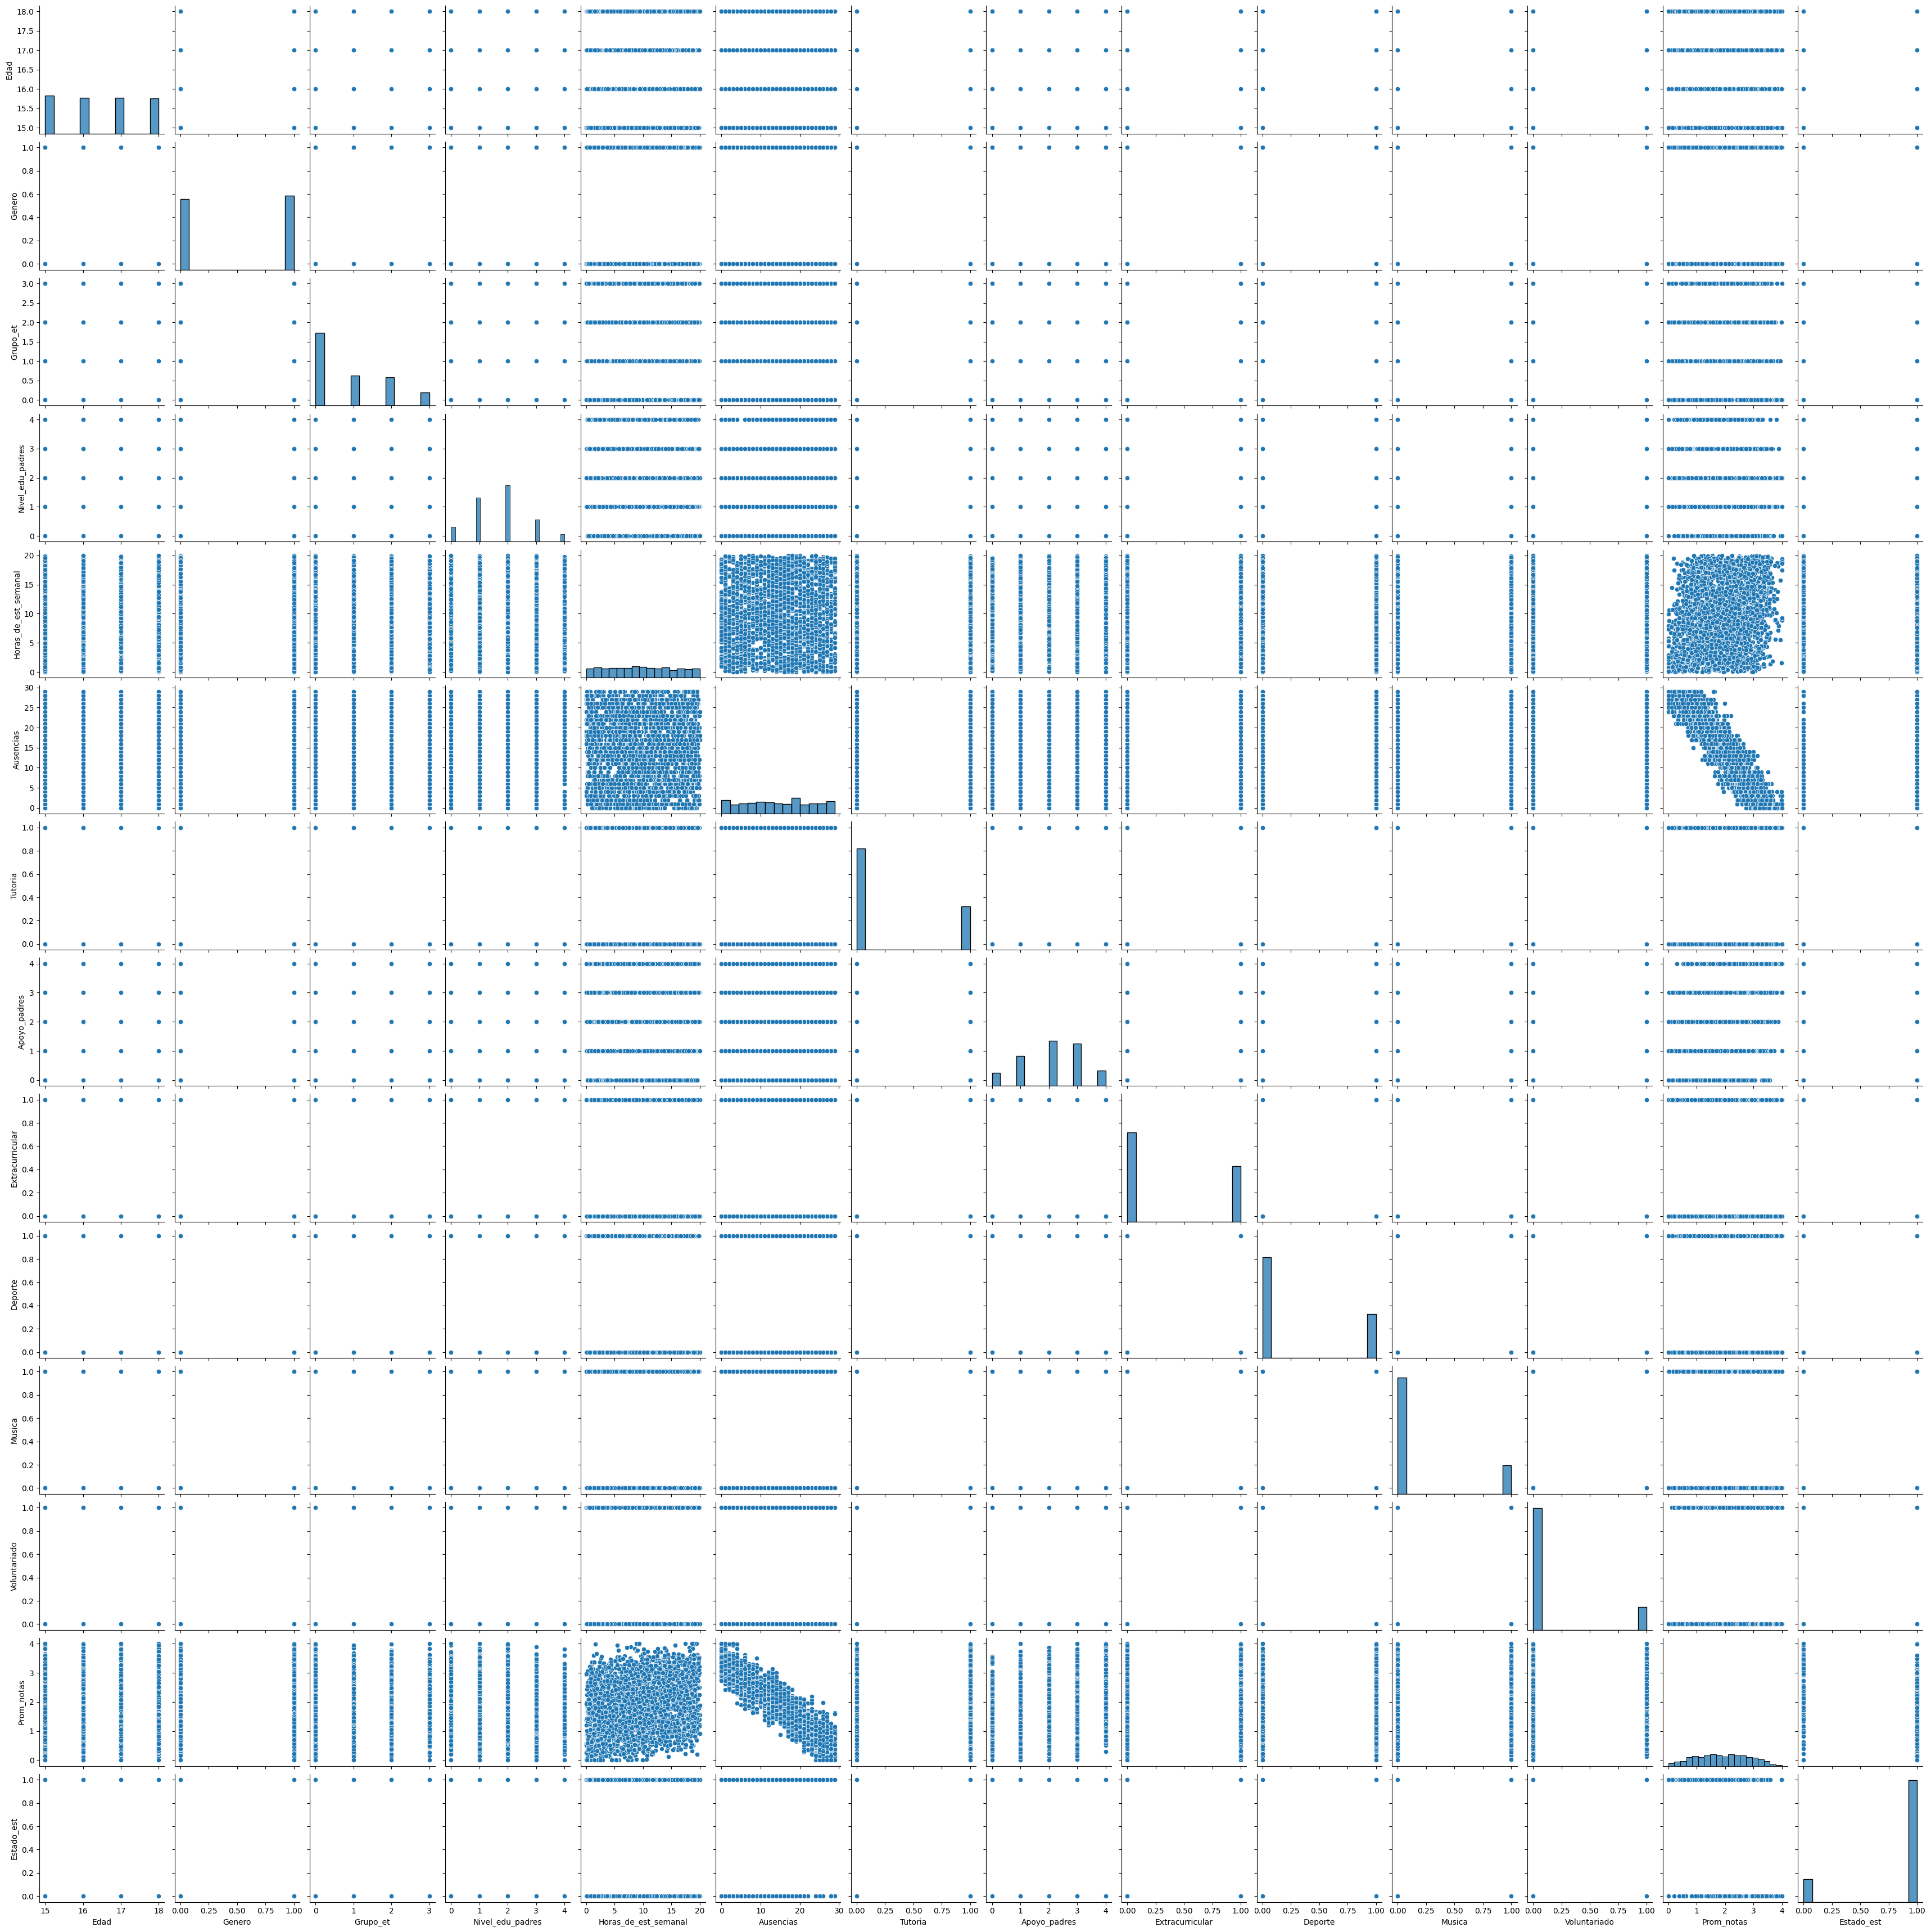

In [580]:
sns.pairplot(df)

### Con el gráfico anterior, se puede notar de una forma evidente que existe correlación inversa entre prom_notas y Ausencias, mostrando que entre mas ausencias la nota es menor,

Por otro lado, y no tan evidente, pero si de manera muy leve, aparentemente se nota lo siguiente:

- quienes abandonaron fueron quienes mas ausencias tuvieron.
- quienes se graduaron fueron quienes mas prom de notas obtuvieron
- quienes obtuvieron un promedio de notas alto recibieron mayor apoyo de sus padres

Se concluye que la unica relación notoria en los datos es entre el prom_notas y las Ausencias, sin embargo, hay leves relaciones entre las otras variables mencionadas las cuales vale la pena validar mediante metodos de correlación paramétrica y no paramétrica desplegados a continuación

### Análisis de correlación de Pearson

In [581]:
print("Correlación de Pearson")
df.corr()

Correlación de Pearson


Edad    Genero  Grupo_et  Nivel_edu_padres  \
Edad                  1.000000  0.044895 -0.028473          0.025099   
Genero                0.044895  1.000000  0.016010          0.006771   
Grupo_et             -0.028473  0.016010  1.000000          0.033595   
Nivel_edu_padres      0.025099  0.006771  0.033595          1.000000   
Horas_de_est_semanal -0.006800  0.011469  0.007184         -0.011051   
Ausencias            -0.011511  0.021479 -0.025712          0.036518   
Tutoria              -0.012076 -0.031597 -0.017440         -0.017340   
Apoyo_padres          0.033197  0.008065  0.020922         -0.017463   
Extracurricular      -0.025061 -0.005964 -0.008927          0.007479   
Deporte              -0.046320 -0.008897 -0.004484          0.002029   
Musica               -0.003492  0.007109 -0.014627          0.039439   
Voluntariado          0.013074 -0.000200  0.013468          0.011960   
Prom_notas            0.000275 -0.013360  0.027760         -0.035854   
Estado_est            0.001238  0.013986 -0.010117          0.020194   

                      Horas_de_est_semanal  Ausencias   Tutoria  Apoyo_padres  \
Edad                             -0.006800  -0.011511 -0.012076      0.033197   
Genero                            0.011469   0.021479 -0.031597      0.008065   
Grupo_et                          0.007184  -0.025712 -0.017440      0.020922   
Nivel_edu_padres                 -0.011051   0.036518 -0.017340     -0.017463   
Horas_de_est_semanal              1.000000   0.009326  0.028930      0.035800   
Ausencias                         0.009326   1.000000 -0.015534      0.002108   
Tutoria                           0.028930  -0.015534  1.000000     -0.000824   
Apoyo_padres                      0.035800   0.002108 -0.000824      1.000000   
Extracurricular                  -0.022860   0.000360  0.004865     -0.008381   
Deporte                           0.006836   0.041454  0.006278     -0.006176   
Musica                            0.007791  -0.008692 -0.011385      0.035122   
Voluntariado                     -0.016604  -0.018528 -0.050898     -0.006036   
Prom_notas                        0.179275  -0.919314  0.145119      0.190774   
Estado_est                       -0.119117   0.464493 -0.119308     -0.133114   

                      Extracurricular   Deporte    Musica  Voluntariado  \
Edad                        -0.025061 -0.046320 -0.003492      0.013074   
Genero                      -0.005964 -0.008897  0.007109     -0.000200   
Grupo_et                    -0.008927 -0.004484 -0.014627      0.013468   
Nivel_edu_padres             0.007479  0.002029  0.039439      0.011960   
Horas_de_est_semanal        -0.022860  0.006836  0.007791     -0.016604   
Ausencias                    0.000360  0.041454 -0.008692     -0.018528   
Tutoria                      0.004865  0.006278 -0.011385     -0.050898   
Apoyo_padres                -0.008381 -0.006176  0.035122     -0.006036   
Extracurricular              1.000000 -0.011820 -0.014191     -0.007427   
Deporte                     -0.011820  1.000000 -0.020474     -0.002799   
Musica                      -0.014191 -0.020474  1.000000      0.017224   
Voluntariado                -0.007427 -0.002799  0.017224      1.000000   
Prom_notas                   0.094078  0.057859  0.073318      0.003258   
Estado_est                  -0.056356 -0.039669 -0.048995      0.000327   

                      Prom_notas  Estado_est  
Edad                    0.000275    0.001238  
Genero                 -0.013360    0.013986  
Grupo_et                0.027760   -0.010117  
Nivel_edu_padres       -0.035854    0.020194  
Horas_de_est_semanal    0.179275   -0.119117  
Ausencias              -0.919314    0.464493  
Tutoria                 0.145119   -0.119308  
Apoyo_padres            0.190774   -0.133114  
Extracurricular         0.094078   -0.056356  
Deporte                 0.057859   -0.039669  
Musica                  0.073318   -0.048995  
Voluntariado            0.003258    0.0

In [582]:
corr_pearson = df.corr()

fig = px.imshow(corr_pearson, 
                text_auto='.3f', 
                color_continuous_scale='RdBu_r',
                title='Matriz de Correlación de pearson',
                width=1400,
                height=1000)

fig.update_traces(textfont_size=12) 

fig.show()

### Se evidencia una correlación lineal inversa del -0.91 entre el prom_notas y las ausencias mostrando que en la medida que el estudiante tiene muchas ausencias mas bajo es su promedio de notas

No se evidencia ninguna correlación significativa adicional, sin embargo, se reconfirma una correlación lineal positiva entre el estado del estudiante y las ausencias, lo cual vale la pena tener en cuenta ya que por otros metodos de correlación no paramétricos podría dar nuevos indicios, por ahora, esta correlación lineal es positiva en 0.46 lo que eventualmente indicaría que a mayores ausencias el estado se acerca a 1 el cual es abandono

Por ultimo, vale la pena mencionar que por el método de correlación lineal con el coeficiente de Pearson no se ven relaciones significativa de los datos entre las variables predictoras y aquella a predecir (Estado_est), sin embargo, se continua con la exploración con otros métodos

### Análisis de correlación de Spearman

In [583]:
print("Correlación de Spearman")
df.corr(method="spearman")

Correlación de Spearman


Edad    Genero  Grupo_et  Nivel_edu_padres  \
Edad                  1.000000  0.045268 -0.028075          0.026985   
Genero                0.045268  1.000000  0.012032          0.006975   
Grupo_et             -0.028075  0.012032  1.000000          0.024917   
Nivel_edu_padres      0.026985  0.006975  0.024917          1.000000   
Horas_de_est_semanal -0.007120  0.010996  0.004963         -0.011402   
Ausencias            -0.010806  0.021657 -0.028493          0.035212   
Tutoria              -0.011856 -0.031597 -0.016828         -0.017128   
Apoyo_padres          0.033900  0.005052  0.017520         -0.014541   
Extracurricular      -0.024889 -0.005964 -0.000621          0.007610   
Deporte              -0.046694 -0.008897 -0.002069         -0.002523   
Musica               -0.003311  0.007109 -0.015576          0.031430   
Voluntariado          0.012802 -0.000200  0.012232          0.009850   
Prom_notas           -0.002075 -0.014361  0.031724         -0.034648   
Estado_est            0.001176  0.013986 -0.012041          0.014559   

                      Horas_de_est_semanal  Ausencias   Tutoria  Apoyo_padres  \
Edad                             -0.007120  -0.010806 -0.011856      0.033900   
Genero                            0.010996   0.021657 -0.031597      0.005052   
Grupo_et                          0.004963  -0.028493 -0.016828      0.017520   
Nivel_edu_padres                 -0.011402   0.035212 -0.017128     -0.014541   
Horas_de_est_semanal              1.000000   0.009184  0.028522      0.038925   
Ausencias                         0.009184   1.000000 -0.015448      0.002923   
Tutoria                           0.028522  -0.015448  1.000000     -0.002497   
Apoyo_padres                      0.038925   0.002923 -0.002497      1.000000   
Extracurricular                  -0.023072   0.000569  0.004865     -0.009860   
Deporte                           0.006067   0.041526  0.006278     -0.003371   
Musica                            0.008111  -0.008456 -0.011385      0.030134   
Voluntariado                     -0.016574  -0.018499 -0.050898     -0.005434   
Prom_notas                        0.169082  -0.925467  0.135122      0.176000   
Estado_est                       -0.118750   0.460304 -0.119308     -0.132459   

                      Extracurricular   Deporte    Musica  Voluntariado  \
Edad                        -0.024889 -0.046694 -0.003311      0.012802   
Genero                      -0.005964 -0.008897  0.007109     -0.000200   
Grupo_et                    -0.000621 -0.002069 -0.015576      0.012232   
Nivel_edu_padres             0.007610 -0.002523  0.031430      0.009850   
Horas_de_est_semanal        -0.023072  0.006067  0.008111     -0.016574   
Ausencias                    0.000569  0.041526 -0.008456     -0.018499   
Tutoria                      0.004865  0.006278 -0.011385     -0.050898   
Apoyo_padres                -0.009860 -0.003371  0.030134     -0.005434   
Extracurricular              1.000000 -0.011820 -0.014191     -0.007427   
Deporte                     -0.011820  1.000000 -0.020474     -0.002799   
Musica                      -0.014191 -0.020474  1.000000      0.017224   
Voluntariado                -0.007427 -0.002799  0.017224      1.000000   
Prom_notas                   0.086506  0.051180  0.068787      0.000897   
Estado_est                  -0.056356 -0.039669 -0.048995      0.000327   

                      Prom_notas  Estado_est  
Edad                   -0.002075    0.001176  
Genero                 -0.014361    0.013986  
Grupo_et                0.031724   -0.012041  
Nivel_edu_padres       -0.034648    0.014559  
Horas_de_est_semanal    0.169082   -0.118750  
Ausencias              -0.925467    0.460304  
Tutoria                 0.135122   -0.119308  
Apoyo_padres            0.176000   -0.132459  
Extracurricular         0.086506   -0.056356  
Deporte                 0.051180   -0.039669  
Musica                  0.068787   -0.048995  
Voluntariado            0.000897    0.0

In [584]:
corr_spearman = df.corr(method="spearman")

fig = px.imshow(corr_spearman, 
                text_auto='.3f', 
                color_continuous_scale='RdBu_r',
                title='Matriz de Correlación de Spearman',
                width=1400,
                height=1000)

fig.update_traces(textfont_size=12) 

fig.show()

#### Se evidencia un comportamiento similar en la medición de la correlación de Pearson con Spearman, resaltando nuevamente aquella relación inversa entre el prom_notas y las Ausencias, además del Estado_est y el Prom_notas

Por otro lado, vale la pena mencionar que en las correlaciones anteriormente medidas sobre las variables Prom_notas y Ausencias, se encuentra un Coeficiente de correlación de Pearson levemente menor que el coeficiente de correlación de Spearman, y esto puede dar indicios de que posiblemente la relación entre estas variables es lineal con y fuertemente monotónica

In [585]:
print("Correlación de Kendall")
df.corr(method="kendall")

Correlación de Kendall


Edad    Genero  Grupo_et  Nivel_edu_padres  \
Edad                  1.000000  0.041327 -0.023886          0.022776   
Genero                0.041327  1.000000  0.011214          0.006400   
Grupo_et             -0.023886  0.011214  1.000000          0.021257   
Nivel_edu_padres      0.022776  0.006400  0.021257          1.000000   
Horas_de_est_semanal -0.005498  0.008980  0.003900         -0.008552   
Ausencias            -0.008336  0.017979 -0.021850          0.026567   
Tutoria              -0.010824 -0.031597 -0.015685         -0.015717   
Apoyo_padres          0.028186  0.004581  0.014918         -0.011850   
Extracurricular      -0.022722 -0.005964 -0.000579          0.006983   
Deporte              -0.042628 -0.008897 -0.001929         -0.002315   
Musica               -0.003023  0.007109 -0.014518          0.028840   
Voluntariado          0.011688 -0.000200  0.011400          0.009038   
Prom_notas           -0.001296 -0.011729  0.024114         -0.025719   
Estado_est            0.001074  0.013986 -0.011223          0.013359   

                      Horas_de_est_semanal  Ausencias   Tutoria  Apoyo_padres  \
Edad                             -0.005498  -0.008336 -0.010824      0.028186   
Genero                            0.008980   0.017979 -0.031597      0.004581   
Grupo_et                          0.003900  -0.021850 -0.015685      0.014918   
Nivel_edu_padres                 -0.008552   0.026567 -0.015717     -0.011850   
Horas_de_est_semanal              1.000000   0.006060  0.023293      0.028627   
Ausencias                         0.006060   1.000000 -0.012825      0.002188   
Tutoria                           0.023293  -0.012825  1.000000     -0.002264   
Apoyo_padres                      0.028627   0.002188 -0.002264      1.000000   
Extracurricular                  -0.018842   0.000473  0.004865     -0.008940   
Deporte                           0.004954   0.034475  0.006278     -0.003056   
Musica                            0.006624  -0.007020 -0.011385      0.027321   
Voluntariado                     -0.013535  -0.015358 -0.050898     -0.004926   
Prom_notas                        0.113292  -0.763221  0.110352      0.130991   
Estado_est                       -0.096979   0.382142 -0.119308     -0.120095   

                      Extracurricular   Deporte    Musica  Voluntariado  \
Edad                        -0.022722 -0.042628 -0.003023      0.011688   
Genero                      -0.005964 -0.008897  0.007109     -0.000200   
Grupo_et                    -0.000579 -0.001929 -0.014518      0.011400   
Nivel_edu_padres             0.006983 -0.002315  0.028840      0.009038   
Horas_de_est_semanal        -0.018842  0.004954  0.006624     -0.013535   
Ausencias                    0.000473  0.034475 -0.007020     -0.015358   
Tutoria                      0.004865  0.006278 -0.011385     -0.050898   
Apoyo_padres                -0.008940 -0.003056  0.027321     -0.004926   
Extracurricular              1.000000 -0.011820 -0.014191     -0.007427   
Deporte                     -0.011820  1.000000 -0.020474     -0.002799   
Musica                      -0.014191 -0.020474  1.000000      0.017224   
Voluntariado                -0.007427 -0.002799  0.017224      1.000000   
Prom_notas                   0.070648  0.041798  0.056177      0.000732   
Estado_est                  -0.056356 -0.039669 -0.048995      0.000327   

                      Prom_notas  Estado_est  
Edad                   -0.001296    0.001074  
Genero                 -0.011729    0.013986  
Grupo_et                0.024114   -0.011223  
Nivel_edu_padres       -0.025719    0.013359  
Horas_de_est_semanal    0.113292   -0.096979  
Ausencias              -0.763221    0.382142  
Tutoria                 0.110352   -0.119308  
Apoyo_padres            0.130991   -0.120095  
Extracurricular         0.070648   -0.056356  
Deporte                 0.041798   -0.039669  
Musica                  0.056177   -0.048995  
Voluntariado            0.000732    0.0

In [586]:
corr_kendall = df.corr(method="kendall")

fig = px.imshow(corr_kendall, 
                text_auto='.3f', 
                color_continuous_scale='RdBu_r',
                title='Matriz de Correlación de Kendall',
                width=1400,
                height=1000)

fig.update_traces(textfont_size=12) 

fig.show()

#### Los resultados obtenidos mediante el coeficiente de correlación de Kendall, a pesar de ser mas castigada las correlaciones, reafirma lo visto con Pearson y Spearman

### Dado lo anterior, se visualiza la correlación principal indicada del análisis previo

In [587]:
fig = px.scatter(df, x='Ausencias', y='Prom_notas', title='Gráfico de Dispersión Ausencias - Prom_notas', labels={'x': 'Ausencias', 'y': 'Prom_notas'}, width=700, height=500)
fig.update_traces(marker=dict(size=13))

# Mostrar el gráfico
fig.show()

### Además, se muestras las correlaciones secundarias a continuación

In [588]:
fig = px.scatter(df, x= 'Estado_est', y='Ausencias', title='Gráfico de Dispersión Ausencias - Estado_est', labels={'x': 'Estado_est', 'y': 'Ausencias'}, width=700, height=500)
fig.update_traces(marker=dict(size=13))

# Mostrar el gráfico
fig.show()

In [589]:
fig = px.scatter(df, x= 'Estado_est', y='Prom_notas', title='Gráfico de Dispersión Prom_notas - Estado_est', labels={'x': 'Estado_est', 'y': 'Prom_notas'}, width=700, height=500)
fig.update_traces(marker=dict(size=13))

# Mostrar el gráfico
fig.show()

In [590]:
fig = px.scatter(df, x= 'Estado_est', y='Horas_de_est_semanal', title='Gráfico de Dispersión Horas_de_est_semanal - Estado_est', labels={'x': 'Estado_est', 'y': 'Horas_de_est_semanal'}, width=700, height=500)
fig.update_traces(marker=dict(size=13))

# Mostrar el gráfico
fig.show()

##### Cómo conclusión de este ejercicio, en esta última parte, aquellas correlaciones secundarias identificadas, se puede valorar visualmente que a pesar de que hay un patrón de comportamiento entre estas variables, no es contundente, además sus coeficientes de correlación asi lo terminan reafirmando

### Importante

Por otro lado, es importante para continuar con el entendimiento de los datos, analizar las variables numéricas como Ausencias y Horas_de_est_semanal con la categoría del Estado_est la cual incialmente se contempla como la variable a predecir

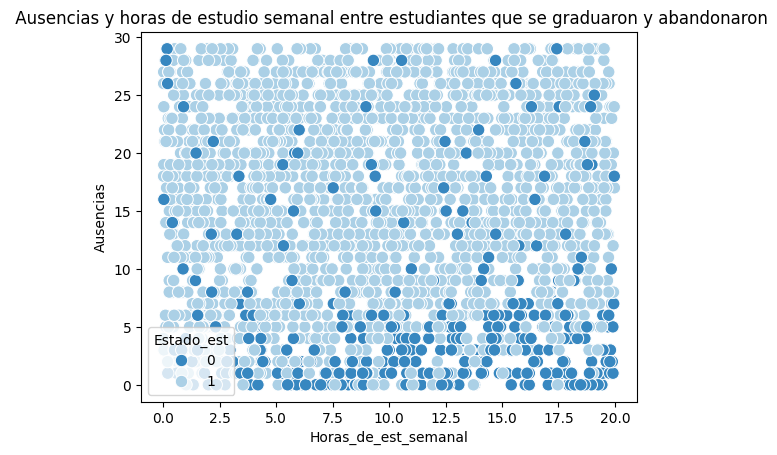

In [591]:
sns.scatterplot(x="Horas_de_est_semanal", y="Ausencias", hue="Estado_est", data=df, palette="Blues_r", s=80)
plt.title(" Ausencias y horas de estudio semanal entre estudiantes que se graduaron y abandonaron")
plt.show()

### Se puede notar de acuerdo a la gráfica anterior:

- Los estudiantes que se graduaron = 0, tienen menor reporte de ausencias que aquellos estudiantes que abandonaron = 1, esto quiere decir de que a pesar de que no es tan evidente esta relación en un gráfico de dispersión o eventualmente con un coeficiente de correlación, vale la pena explorar este comportamiento
- Se nota levemente que aquellos estudiantes que dedicaron mas horas de estudio semanal lograron Graduarse

### Elección de la variable para analisis bivariado

De acuerdo al tipo de análisis y a la pregunta establecida, la variable base a analizar es el Estado_est, la cual permite clasificar si el estudiante se Graduó=0, o abandonó=1

In [592]:
fig = px.box(df, x='Estado_est', y='Prom_notas', title='Gráfico de cajas Estado estudiante con su promedio de notas', width=700, height=500)

# Mostrar el gráfico
fig.show()

In [593]:
fig = px.violin(df, x='Estado_est', y='Prom_notas', box=True, labels={'Prom_notas': 'Prom_notas'}, title='Gráfico de violín Estado estudiante con Prom_notas', width=700, height=500)

# Mostrar el gráfico
fig.show()

##### Se evidencia que aquellos estudiantes que se graduaron obtuvieron mejor promedio de notas, además que su promedio de notas se mueve en un IQR mas compacto en comparación con el rango IQR de notas de aquellos estudiantes que abandonaron, es decir, hay menos varianza en las notas de los estudiantes que se graduaron

In [594]:
fig = px.box(df, x='Estado_est', y='Edad', title='Gráfico de cajas Estado estudiante con su Edad', width=700, height=500)

# Mostrar el gráfico
fig.show()

#### No hay mucha evidencia en este gráfico, mas que indicar que hay mas varianza en la edad de aquellos estudiantes que se graduaron que aquellos que abandonaron

In [595]:
fig = px.box(df, x='Estado_est', y='Ausencias', title='Gráfico de cajas Estado estudiante con Ausencias', width=700, height=500)

# Mostrar el gráfico
fig.show()

In [596]:
fig = px.violin(df, x='Estado_est', y='Ausencias', box=True, labels={'Ausencias': 'Ausencias'}, title='Gráfico de violín Estado estudiante con Ausencias', width=700, height=500)

# Mostrar el gráfico
fig.show()

#### Es interesante esta visual ya que indica que el grupo de estudiantes que abandonaron tuvieron mayor varianza en sus reportes de ausencias, mientras que aquellos estudiantes que se graduaron se compactan con bajas ausencias, eso se nota por el tipo de boxplot y violinplot de los graduados, donde su distribución marca sesgo hacia la derecha

In [597]:
fig = px.box(df, x='Estado_est', y='Horas_de_est_semanal', title='Gráfico de cajas Estado estudiante con Horas_de_est_semanal', width=700, height=500)

# Mostrar el gráfico
fig.show()

#### Frente a las horas de estudio semanal de aquellos estudiantes que se graduaron y abandonaron, se nota levemente que la mediana de los graduados marca mas horas de estudio semanal en comparacion con los que abandonaron, además, que la distribución de quienes abandonaron es aparentemente normal, en comparación con la distribucion de los graduados donde se muestra un leve sesgo a la izquierda, queriendo decir esto que las horas de estudio semanal de quienes se graduaron se compactan mas levemente hacia mas horas de estudio

In [598]:
fig = px.box(df, x='Estado_est', y='Apoyo_padres', title='Gráfico de cajas Estado estudiante con Apoyo_padres', width=700, height=500)

# Mostrar el gráfico
fig.show()

In [599]:
fig = px.violin(df, x='Estado_est', y='Apoyo_padres', box=True, labels={'Apoyo_padres': 'Apoyo_padres'}, title='Gráfico de cajas Estado estudiante con Apoyo_padres', width=700, height=500)

# Mostrar el gráfico
fig.show()

#### Esta visual da indicios de que el nivel de apoyo de los padres en los estudiantes influye en el estado (graduado-abandono), pues se nota que los graduados recibieron mayor apoyo de los padres que quienes abandonaron, además, el rango de los boxplot y la mediana muestra tambien ese comportamiento

# **8. Premodelamiento/Preparación de los datos**

## A continuación se despliegan modelos sin haber hecho ningun preprocesamiento de datos, posteriormente se hará este paso para evidenciar las diferencias en la predicción

In [744]:
df.head()

Edad  Genero  Grupo_et  Nivel_edu_padres  Horas_de_est_semanal  Ausencias  \
0    17    True         0                 2             19.833723          7   
1    18   False         0                 1             15.408756          0   
2    15   False         2                 3              4.210570         26   
3    17    True         0                 3             10.028829         14   
4    17    True         0                 2              4.672495         17   

   Tutoria  Apoyo_padres  Extracurricular  Deporte  Musica  Voluntariado  \
0     True             2            False    False    True         False   
1    False             1            False    False   False         False   
2    False             2            False    False   False         False   
3    False             3             True    False   False         False   
4     True             3            False    False   False         False   

   Prom_notas  Estado_est  
0    2.929196           1  
1    3.042915           0  
2    0.112602           1  
3    2.054218           1  
4    1.288061           1

In [745]:
#Escojamos nuestras variables predictoras
predictores = ['Ausencias','Prom_notas']
#Escojamos que es lo que queremos encontrar
objetivo= 'Estado_est'

#Recordemos que en nuestra variable Y va lo que queremos encontrar/predecir.
#Mientras en la vairable X van las variables que usaremos para encontrar a Y
y= df[objetivo].values
X= df[predictores].values

In [746]:
from sklearn.model_selection import train_test_split
# Crear conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1913, 2)
(479, 2)
(1913,)
(479,)


## **Modelo de regresión logística sin preprocesamiento**

In [747]:
# Se importa el modelo
from sklearn.linear_model import LogisticRegression

#Se crea el modelo
log_reg = LogisticRegression(solver='lbfgs',max_iter=100)
#se entrena el modelo
log_reg.fit(X_train, y_train)

LogisticRegression()

In [748]:
Reg_log_SP = log_reg.score(X_test, y_test)*100
print(f"Precisión del modelo:", Reg_log_SP) 

Precisión del modelo: 94.1544885177453


## **Modelo de HistGradientBoostClassifier sin preprocesamiento**

In [749]:
from sklearn.ensemble import (HistGradientBoostingClassifier)

hgbm = HistGradientBoostingClassifier(random_state=42)
hgbm.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=42)

In [750]:
print(f"Precisión del modelo:", hgbm.score(X_test, y_test)*100)

Precisión del modelo: 95.61586638830897


## **Modelo de Arbol de decisión sin preprocesamiento**

In [751]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [752]:
# Evaluar el modelo (predicción y cálculo de precisión)
y_pred = clf.predict(X_test)
accuracy = (y_pred == y_test).mean()
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

Precisión del modelo: 96.03%


## **Modelo de KNN sin preprocesamiento**

In [753]:
from sklearn.neighbors import KNeighborsClassifier

# Crear una instancia del modelo K-Nearest Neighbors:
knn = KNeighborsClassifier(n_neighbors=13, weights='uniform', algorithm='auto', p=2, metric='minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [754]:
# Evaluar el modelo (predicción y cálculo de precisión)
y_pred = knn.predict(X_test)
accuracy = (y_pred == y_test).mean()
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

Precisión del modelo: 94.78%


## A continuación se hace el preprocesamiento de datos para el modelamiento

### Preparación de variables numéricas MinMaxScaler

Aplicar el método MinMaxScaler es necesario en este caso ya que se tienen variables en diferentes escalas (Edad, Horas_de_est_semanal, Ausencias, Prom_notas), estas variables se eligen ya que:

1. Son las variables numéricas del dataset
2. Se usarán en el proceso de entrenamiento de modelos iterando entre ellas y la var objetivo (Estado_est)
3. Homogeneizar las variables para su modelamiento

In [756]:
from sklearn.preprocessing import MinMaxScaler
variables = ['Edad', 'Horas_de_est_semanal', 'Ausencias', 'Prom_notas']
scaler = MinMaxScaler()

df_scaled = df.copy()
df_scaled[variables] = scaler.fit_transform(df[variables])

df_scaled.head()

Edad  Genero  Grupo_et  Nivel_edu_padres  Horas_de_est_semanal  \
0  0.666667    True         0                 2              0.992773   
1  1.000000   False         0                 1              0.771270   
2  0.000000   False         2                 3              0.210718   
3  0.666667    True         0                 3              0.501965   
4  0.666667    True         0                 2              0.233840   

   Ausencias  Tutoria  Apoyo_padres  Extracurricular  Deporte  Musica  \
0   0.241379     True             2            False    False    True   
1   0.000000    False             1            False    False   False   
2   0.896552    False             2            False    False   False   
3   0.482759    False             3             True    False   False   
4   0.586207     True             3            False    False   False   

   Voluntariado  Prom_notas  Estado_est  
0         False    0.732299           1  
1         False    0.760729           0  
2         False    0.028151           1  
3         False    0.513555           1  
4         False    0.322015           1

### Preparación de variables categóricas

Aplicar encoding a variables categóricas es necesario en este caso ya que se tienen variables ordinales y nominales (Genero, Grupo_et, Nivel_edu_padres, Tutoria, Apoyo_padres, Extracurricular, Deporte)

Para la Preparación de los datos anteriores, es necesario identificar aquellas variables que tengan mas de dos categorías para reemplazar los valores asignados segun su categoría en su label correspondiente y luego aplicar la tecnica de onehotencoder.

El proceso anterior es necesario realizar antes de aplicar onehotencoder ya que los valores categoricos del dataset original tienen por defecto un valor numerico, representado en escala secuencial de 0 a n (de acuerdo al numero de categorias de la variable)  y esto es perjudicial al momento de entrenar un modelo, ya que se le estaría diciendo al modelo que las distancias de cada unidad son equivalentes entre las categorias y esto no es cierto (para casos puntuales), por lo cual, para evitar ese sesgo se reasignan las categorias correspondientes para proceder con la preparación.

Según lo explicado, se toman las variables (Grupo_et, Nivel_edu_padres, Apoyo_padres)

In [757]:
df_scaled['Grupo_et'] = df_scaled['Grupo_et'].replace({0: "Caucasico", 1: "Afroamericano", 2: "Asiatico", 3: "Otros"})

df_scaled['Nivel_edu_padres'] = df_scaled['Nivel_edu_padres'].replace({0: "Ninguno", 1: "Escuela_secundaria", 2: "Un_poco_de_universidad", 3: "Licenciatura", 4: "Superior"})

df_scaled['Apoyo_padres'] = df_scaled['Apoyo_padres'].replace({0: "Ninguno", 1: "Bajo", 2: "Moderado", 3: "Alto", 4: "Muy_alto"})

df_scaled.head()

Edad  Genero   Grupo_et        Nivel_edu_padres  Horas_de_est_semanal  \
0  0.666667    True  Caucasico  Un_poco_de_universidad              0.992773   
1  1.000000   False  Caucasico      Escuela_secundaria              0.771270   
2  0.000000   False   Asiatico            Licenciatura              0.210718   
3  0.666667    True  Caucasico            Licenciatura              0.501965   
4  0.666667    True  Caucasico  Un_poco_de_universidad              0.233840   

   Ausencias  Tutoria Apoyo_padres  Extracurricular  Deporte  Musica  \
0   0.241379     True     Moderado            False    False    True   
1   0.000000    False         Bajo            False    False   False   
2   0.896552    False     Moderado            False    False   False   
3   0.482759    False         Alto             True    False   False   
4   0.586207     True         Alto            False    False   False   

   Voluntariado  Prom_notas  Estado_est  
0         False    0.732299           1  
1         False    0.760729           0  
2         False    0.028151           1  
3         False    0.513555           1  
4         False    0.322015           1

### En este lado, se asegura que las variables esten en tipo str para su respectivo encoding

In [758]:
df_scaled['Grupo_et'] = df_scaled['Grupo_et'].astype(str)
df_scaled['Nivel_edu_padres'] = df_scaled['Nivel_edu_padres'].astype(str)
df_scaled['Apoyo_padres'] = df_scaled['Apoyo_padres'].astype(str)

### Se procede a aplicar el OneHotEncoder a las variables indicadas

In [759]:
columnas_a_codificar = ['Grupo_et', 'Nivel_edu_padres', 'Apoyo_padres']
onehotencoder = OneHotEncoder(sparse_output=False)  # No se eliminará la primera categoría

# Aplicar el OneHotEncoder y transformar las columnas seleccionadas
encoded_features = onehotencoder.fit_transform(df_scaled[columnas_a_codificar])

# Convertir las características codificadas a un DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=onehotencoder.get_feature_names_out(columnas_a_codificar))

# Concatenar las nuevas columnas codificadas con el DataFrame original (sin las columnas originales)
df_scaled = pd.concat([df_scaled.drop(columns=columnas_a_codificar), encoded_df], axis=1)

In [760]:
# Visualizar el DataFrame codificado sin limitaciones enel numero de columnas
pd.set_option('display.max_columns', None)
df_scaled.head()

Edad  Genero  Horas_de_est_semanal  Ausencias  Tutoria  \
0  0.666667    True              0.992773   0.241379     True   
1  1.000000   False              0.771270   0.000000    False   
2  0.000000   False              0.210718   0.896552    False   
3  0.666667    True              0.501965   0.482759    False   
4  0.666667    True              0.233840   0.586207     True   

   Extracurricular  Deporte  Musica  Voluntariado  Prom_notas  Estado_est  \
0            False    False    True         False    0.732299           1   
1            False    False   False         False    0.760729           0   
2            False    False   False         False    0.028151           1   
3             True    False   False         False    0.513555           1   
4            False    False   False         False    0.322015           1   

   Grupo_et_Afroamericano  Grupo_et_Asiatico  Grupo_et_Caucasico  \
0                     0.0                0.0                 1.0   
1                     0.0                0.0                 1.0   
2                     0.0                1.0                 0.0   
3                     0.0                0.0                 1.0   
4                     0.0                0.0                 1.0   

   Grupo_et_Otros  Nivel_edu_padres_Escuela_secundaria  \
0             0.0                                  0.0   
1             0.0                                  1.0   
2             0.0                                  0.0   
3             0.0                                  0.0   
4             0.0                                  0.0   

   Nivel_edu_padres_Licenciatura  Nivel_edu_padres_Ninguno  \
0                            0.0                       0.0   
1                            0.0                       0.0   
2                            1.0                       0.0   
3                            1.0                       0.0   
4                            0.0                       0.0   

   Nivel_edu_padres_Superior  Nivel_edu_padres_Un_poco_de_universidad  \
0                        0.0                                      1.0   
1                        0.0                                      0.0   
2                        0.0                                      0.0   
3                        0.0                                      0.0   
4                        0.0                                      1.0   

   Apoyo_padres_Alto  Apoyo_padres_Bajo  Apoyo_padres_Moderado  \
0                0.0                0.0                    1.0   
1                0.0                1.0                    0.0   
2                0.0                0.0                    1.0   
3                1.0                0.0                    0.0   
4                1.0                0.0                    0.0   

   Apoyo_padres_Muy_alto  Apoyo_padres_Ninguno  
0                    0.0                   0.0  
1                    0.0                   0.0  
2                    0.0                   0.0  
3                    0.0                   0.0  
4                    0.0                   0.0

### Análisis de la aplicación de las técnicas de preprocesamiento/premodelamiento/preparación de los datos para el modelado

Es necesario hacer los cambios en el df para trabajar con valores numéricos, ya que hay modelos que requieren solo numeros para sus procesos-
Por otro lado, se evidencia que el df se extendío en el numero de variables, lo que puede suponer problemas en casos mas robustos para la etapa siguiente, ya que entre mas variables se tengan mas se diluye la información

# **9. Modelamiento**

### Elección de variables predictoras y objetivo

In [761]:
#Escojamos nuestras variables predictoras
predictores = ['Ausencias','Prom_notas']
#Escojamos que es lo que queremos encontrar
objetivo= 'Estado_est'

#Recordemos que en nuestra variable Y va lo que queremos encontrar/predecir.
#Mientras en la vairable X van las variables que usaremos para encontrar a Y
y= df_scaled[objetivo].values
X= df_scaled[predictores].values

### Importación del módulo de entrenamiento y testeo

In [762]:
from sklearn.model_selection import train_test_split
# Crear conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1913, 2)
(479, 2)
(1913,)
(479,)


## **Modelo de regresión logística**

In [763]:
# Se importa el modelo
from sklearn.linear_model import LogisticRegression

#Se crea el modelo
log_reg = LogisticRegression(solver='lbfgs',max_iter=100)
#se entrena el modelo
log_reg.fit(X_train, y_train)

LogisticRegression()

In [764]:
print(f"Precisión del modelo:", log_reg.score(X_test, y_test)*100)

Precisión del modelo: 93.52818371607515


In [765]:
y_predict = log_reg.predict(X_test)

print("******************** Matriz de confusión **************************")
print(confusion_matrix(y_test, y_predict))

print("******************** Reporte **************************")
print(classification_report(y_test, y_predict)) 

******************** Matriz de confusión **************************
[[ 44  27]
 [  4 404]]
******************** Reporte **************************
              precision    recall  f1-score   support

           0       0.92      0.62      0.74        71
           1       0.94      0.99      0.96       408

    accuracy                           0.94       479
   macro avg       0.93      0.80      0.85       479
weighted avg       0.93      0.94      0.93       479



## **Modelo de HistGradientBoostClassifier**

In [766]:
from sklearn.ensemble import (HistGradientBoostingClassifier)

hgbm = HistGradientBoostingClassifier(random_state=42)
hgbm.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=42)

In [768]:
print(f"Precisión del modelo:", hgbm.score(X_test, y_test)*100)

Precisión del modelo: 95.61586638830897


In [769]:
y_predict = hgbm.predict(X_test)

print("******************** Matriz de confusión **************************")
print(confusion_matrix(y_test, y_predict))

print("******************** Reporte **************************")
print(classification_report(y_test, y_predict)) 

******************** Matriz de confusión **************************
[[ 58  13]
 [  8 400]]
******************** Reporte **************************
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        71
           1       0.97      0.98      0.97       408

    accuracy                           0.96       479
   macro avg       0.92      0.90      0.91       479
weighted avg       0.96      0.96      0.96       479



## **Modelo de Arbol de decisión**

In [770]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [771]:
# Evaluar el modelo (predicción y cálculo de precisión)
y_pred = clf.predict(X_test)
accuracy = (y_pred == y_test).mean()
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

Precisión del modelo: 96.03%


In [719]:
y_predict = clf.predict(X_test)

print("******************** Matriz de confusión **************************")
print(confusion_matrix(y_test, y_predict))

print("******************** Reporte **************************")
print(classification_report(y_test, y_predict)) 

******************** Matriz de confusión **************************
[[ 58  13]
 [  6 402]]
******************** Reporte **************************
              precision    recall  f1-score   support

           0       0.91      0.82      0.86        71
           1       0.97      0.99      0.98       408

    accuracy                           0.96       479
   macro avg       0.94      0.90      0.92       479
weighted avg       0.96      0.96      0.96       479



## **Modelo de KNN**

In [772]:
from sklearn.neighbors import KNeighborsClassifier

# Crear una instancia del modelo K-Nearest Neighbors:
knn = KNeighborsClassifier(n_neighbors=13, weights='uniform', algorithm='auto', p=2, metric='minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [774]:
# Evaluar el modelo (predicción y cálculo de precisión)
y_pred = knn.predict(X_test)
accuracy = (y_pred == y_test).mean()
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

Precisión del modelo: 95.41%


In [775]:
y_predict = knn.predict(X_test)

print("******************** Matriz de confusión **************************")
print(confusion_matrix(y_test, y_predict))

print("******************** Reporte **************************")
print(classification_report(y_test, y_predict)) 

******************** Matriz de confusión **************************
[[ 57  14]
 [  8 400]]
******************** Reporte **************************
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        71
           1       0.97      0.98      0.97       408

    accuracy                           0.95       479
   macro avg       0.92      0.89      0.91       479
weighted avg       0.95      0.95      0.95       479



# **Conclusiones de modelado de datos**

1. Para este caso, el modelo de regresión logística muestra mejor score sin preprocesamiento de los datos, teniendo los siguientes resutados: 
    - Score sin preprocesamiento: 94.15%
    - Score con preprocesamiento: 93.52%

2. El modelo de HistGradientBoostingClassifier muestra igual score en ambos casos, teniendo los siguientes resutados: 
    - Score sin preprocesamiento: 95.61%
    - Score con preprocesamiento: 95.61%

3. El modelo de DecisionTreeClassifier muestra igual score en ambos casos, teniendo los siguientes resutados: 
    - Score sin preprocesamiento: 96.03%
    - Score con preprocesamiento: 96.03%

4. El modelo de KNeighborsClassifier muestra mejor score cuando se hace preprocesamiento de datos, teniendo los siguientes resutados: 
    - Score sin preprocesamiento: 94.78%
    - Score con preprocesamiento: 95.41%


*Se puede notar que hay modelos que no registran cambios en el score, sin embargo, en los modelos de LogisticRegression y KNeighborsClassifier si se ven cambios, donde el KNN se ve con mejor rendimiento cuando se hace el preprocesamiento de los datos y el de regresión logistica tiene un comportamiento inverso.*

El cambio en el modelo KNN puede deberse a que es un algoritmo que trabaja con distancias euclidianas según los parámetros indicados, lo que lo vuelve sensible a las escalas de las variables. Por otro lado, el modelo de regresión logística, si bien no trabaja con distancias euclidianas, trabaja con probabilidades y coeficientes que determinan la influencia de cada variable en la predicción final. Esto lo hace sensible a la multicolinealidad y a la correcta especificación del modelo. Además, cualquier cambio en la distribución de los datos, la inclusión o exclusión de variables, o la presencia de outliers puede alterar los coeficientes, impactando directamente en la predicción del modelo. Por lo tanto, tanto la preparación de los datos como la selección de variables son críticas para mantener la consistencia en los resultados de la regresión logística

Por ultimo, no se evidencia cambios en el score de los modelos derivados de condicionales como lo son el arbol de decision en el HistGradientBoostingClassifier ya que son modelos que se basan en separación de caracteristicas formando estructuras en lugar de medir distancias